In [111]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import NullFormatter, FixedLocator
import numpy as np

In [2]:
df = pd.read_csv('full_experiments.csv', index_col=0)

In [53]:
df = pd.read_csv('full_experiments_density_indep_n.csv', index_col=0)

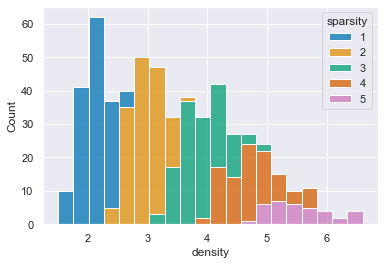

In [4]:
sns.histplot(data=df, x="density", hue="sparsity", palette="colorblind",  bins=20, multiple="stack");

In [134]:
dft = df#df.iloc[350:400]
dft['rho_cat'] = None

In [135]:
dft.loc[(2.5<=dft['density']) & (dft['density']<=3.5), 'rho_cat'] = r'${} \le \rho \le {}$'.format(2.5,3.5)
dft.loc[(3.5<=dft['density']) & (dft['density']<=4.5), 'rho_cat'] = r'${} \le \rho \le {}$'.format(3.5,4.5)
#dft.loc[(4.5<=dft['density']) & (dft['density']<=5.5), 'rho_cat'] = r'${} \le \rho \le {}$'.format(4.5,5.5)

In [136]:
allbounds = [(2.5,3.5),(3.5,4.5),(4.5,5.5)]
bounds = allbounds[0]
selection = (((dft['m']<=50) & (dft['density']<=allbounds[0][1]) & (dft['density']>=allbounds[0][0])) |
             ((dft['m']<=50) & (dft['density']<=allbounds[1][1]) & (dft['density']>=allbounds[1][0])) |
             ((dft['m']<=30) & (dft['density']<=allbounds[2][1]) & (dft['density']>=allbounds[2][0])))
dfclean = dft[selection]
#bounds = allbounds[1]
#dfclean = dfclean[(dfclean['m']<=30) & (dfclean['density']<=bounds[1]) & (dfclean['density']>=bounds[0])]
#bounds = allbounds[2]
#dfclean = dfclean[(dfclean['m']<=30) & (dfclean['density']<=bounds[1]) & (dfclean['density']>=bounds[0])]

In [137]:
#sns.color_palette("binary")

In [235]:
plt.rcParams['text.usetex'] = True

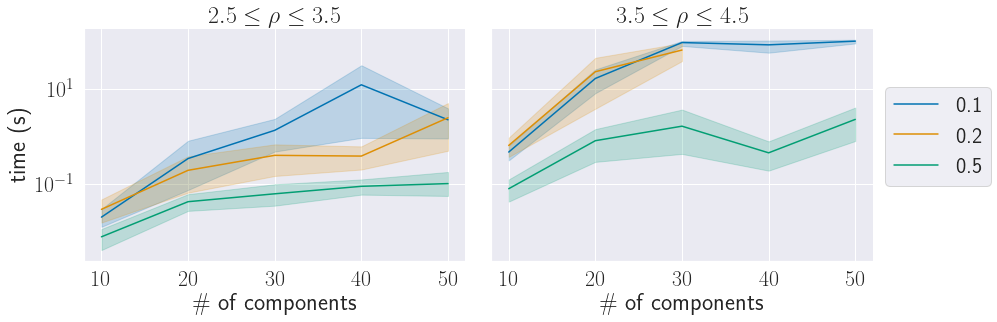

In [139]:
#df[['ncoeff', 'sparsity']].apply(tuple, axis=1)
#plt.style.use('grayscale')
#fig, ax = plt.subplots()
densities = ['low','mid','high']
allbounds = [(2.5,3.5),(3.5,4.5),(4.5,5.5)]
runs = [
    (None,"timeMINFAS",'defense_mintear_time',[10,20,30,40,50]),
    ("ncoeff","timescc",'defense_minscc_time',[10,20,30,40,50]),
    ("ncoeff","timetearfull",'defense_minassign_time_denser',[10,20,30,40,50]),
]
selection = 0
bounds = allbounds[selection]
hue,y,filename,xticks = runs[2]
sns.set(font_scale = 2)
g = sns.relplot(data=dfclean, x="m",  y=y, hue=hue, palette="colorblind", kind="line", col='rho_cat', aspect=1.25);
g = (g.set_axis_labels("\# of components","time (s)")).set(xticks=(xticks))
g.set(yscale = 'log');
# def forward(x):
#     return abs(x)**(1/2)
# def inverse(x):
#     return x**2
# for ax in g.fig.axes:
#     ax.set_yscale('function', functions=(forward, inverse))
#     ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.1)**2))
#     ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.1)))
g.set_titles(col_template = '{col_name}');
#g.set(title= r'${} \le \rho \le {}$'.format(*bounds));
sns.move_legend(g, "lower center",
    bbox_to_anchor=(0.95, 0.4), ncol=1, title=None, frameon=True) 
#plt.savefig(filename+'_disseration.png', dpi=200, bbox_inches="tight")

In [101]:
np.power(np.array((3,4)),2)

array([ 9, 16], dtype=int32)

In [9]:
#sparseL1sq = sparseL1.copy()
#sparseL1sq["sqtimetear"] = np.log(sparseL1sq["timetear"])

In [14]:
dfpost = df.copy()
dfpost["deltascc"] = dfpost['maxscc']-dfpost['minscc']
dfpost["dguesstear"] = dfpost['mintear']-dfpost['minguess']

In [129]:
dfclean = sparseL1[(sparseL1["MINFAS"] <= 100)]

In [130]:
dfpost = dfclean.copy()
dfpost["dminfas"] = dfpost['MINFAS']/dfpost['m']
dfpost["dmintearpart"] = dfpost['mintearpart']/dfpost['m']
dfpost["dmintearfull"] = dfpost['mintearfull']/dfpost['m']

In [131]:
dfpost

,m,ncoeff,n,sparsity,seed,maxscc,guess,timeMINFAS,MINFAS,timetearpart,mintearpart,timetearfull,mintearfull,timescc,minscc,density,dminfas,dmintearpart,dmintearfull
1,10,0.1,11,3,1,10.0,4.0,0.009693,2.0,0.329609,2.0,0.672915,2.0,0.039564,9.0,4.10,0.20,0.20,0.20
2,10,0.1,11,3,2,10.0,5.0,0.004000,2.0,0.072231,1.0,0.073250,0.0,0.003826,0.0,3.70,0.20,0.10,0.00
3,10,0.1,11,3,3,10.0,8.0,0.014692,4.0,0.247854,2.0,0.331308,2.0,0.041113,9.0,3.70,0.40,0.20,0.20
4,10,0.1,11,3,4,8.0,7.0,0.004999,3.0,0.247375,2.0,0.303759,2.0,0.032488,6.0,4.10,0.30,0.20,0.20
5,10,0.1,11,3,5,9.0,7.0,0.012337,3.0,0.273144,3.0,0.539534,3.0,0.047682,9.0,3.60,0.30,0.30,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,50,0.5,75,3,5,16.0,28.0,0.029871,4.0,0.349487,3.0,0.349766,1.0,0.079706,2.0,3.64,0.08,0.06,0.02
551,50,0.5,75,3,6,35.0,30.0,1.077696,5.0,7.439821,3.0,0.527657,0.0,0.069672,0.0,3.92,0.10,0.06,0.00
552,50,0.5,75,3,7,26.0,31.0,0.089327,6.0,3.786320,3.0,3.230341,0.0,0.696880,0.0,4.46,0.12,0.06,0.00
553,50,0.5,75,3,8,36.0,27.0,0.650249,6.0,19.581709,3.0,8.444775,0.0,1.889984,0.0,4.16,0.12,0.06,0.00


In [15]:
dfclean = dfpost[(dfpost["dguesstear"] >= 0)]
#dfclean = dfclean[(dfclean['sparsity']==.5)]

In [16]:
#dfclean["deltascc"].sum()

In [141]:
sns.color_palette()[0]

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

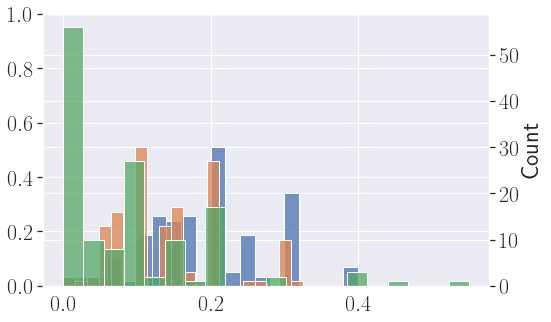

In [142]:
fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()
#sns.histplot(data=dfpost, x="dminfas", palette="colorblind", bins=20, multiple="stack");
sns.histplot(data=dfpost, x="dminfas", bins=20, color=sns.color_palette()[0]);
sns.histplot(data=dfpost, x="dmintearpart", bins=20, color=sns.color_palette()[1]);
sns.histplot(data=dfpost, x="dmintearfull", bins=20, color=sns.color_palette()[2]);
#ax.set_xlabel(r'$\Delta$ in guess');
#plt.savefig('tearing_improvements_wrt_baseline.png', dpi=200, bbox_inches='tight');

In [348]:
dfclean2 = dft[(dft["timeMINFAS"] <= 100) & (dft["timetearpart"] <= 100) & (dft["timetearfull"] <= 100) & (2.5<=dft['density']) & (dft['density']<=4.5)]

In [349]:
dfclean2 = dfclean2.convert_dtypes()

In [350]:
len(dfclean2["MINFAS"])

269

In [351]:
from itertools import product, chain

In [376]:
partition_results = lambda col_label, col_name: (tuple(row)+(col_label,) for row in dfclean2[[col_name, 'm']].to_records(index=False))

In [377]:
#[tuple(row)+('Minimum feedbac',) for row in dfclean2[["MINFAS", 'm']].to_records(index=False)]

In [378]:
dfcompare = pd.DataFrame(chain(partition_results('Minimum feedback','MINFAS'),
                               partition_results('Regular tearing','mintearpart'),
                               partition_results('Extended Tearing','mintearfull')))

In [380]:
dfcompare.columns = ["sys_size", 'm', 'opt_type']

In [398]:
sum((dfcompare["opt_type"]=='Regular tearing') & (dfcompare["sys_size"]==0))

13

In [382]:
plt.rcParams['text.usetex'] = True

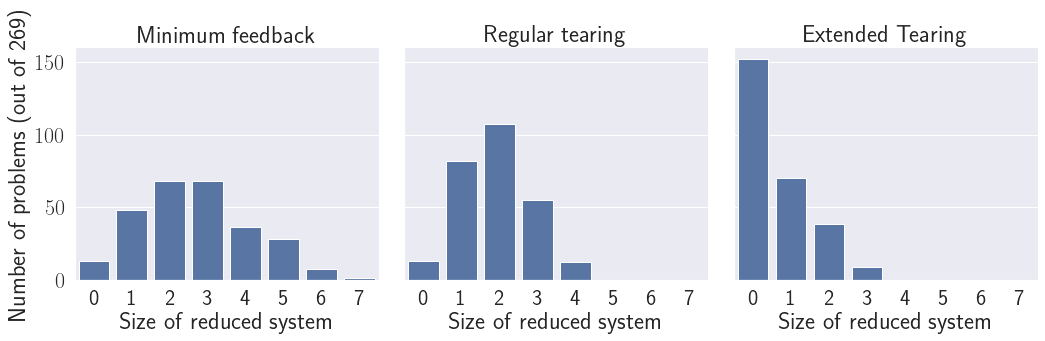

In [390]:
g = sns.catplot(data=dfcompare, x="sys_size", kind='count', col='opt_type', color=sns.color_palette()[0]);
g.set_axis_labels(r'Size of reduced system',r'Number of problems (out of 269)')
g.set_titles(col_template = '{col_name}');
plt.savefig('mintearfull_finalsize.png', dpi=200, bbox_inches='tight');

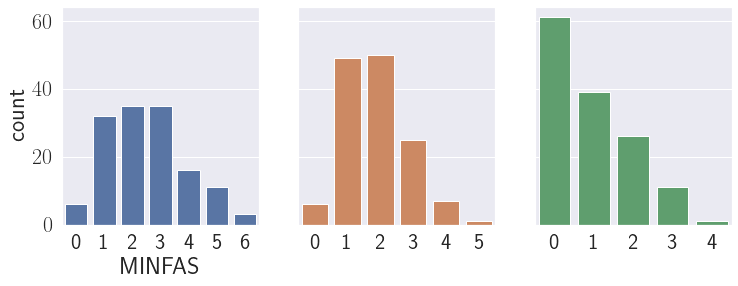

In [329]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
#ax2 = ax.twinx()
#sns.histplot(data=dfpost, x="dminfas", hue="ncoeff", palette="colorblind", bins=20, multiple="stack");
#g=sns.histplot(data=dfclean2, x="MINFAS", palette="colorblind", multiple="stack", color=sns.color_palette()[0]);
#g=sns.histplot(data=dfclean2, x="mintearpart", palette="colorblind", multiple="stack", color=sns.color_palette()[1]);
sns.countplot(data=dfclean2, x="MINFAS", color=sns.color_palette()[0], ax=axs[0]);
sns.countplot(data=dfclean2, x="mintearpart", color=sns.color_palette()[1], ax=axs[1]);
sns.countplot(data=dfclean2, x="mintearfull", color=sns.color_palette()[2], ax=axs[2]);
for ax in axs[1:]:
    ax.set(ylabel=None) 
    ax.set(xlabel=r'') 
# sns.move_legend(g, "lower center",
#     bbox_to_anchor=(1.2, 0.4), ncol=1, title=None, frameon=True) 
#axs[0].set_ylabel(r'Number of problems (out of 67)');
#plt.xlabel(r'Size of final system (m=20)');
plt.savefig('mintearfull_finalsize.png', dpi=200, bbox_inches='tight');

## Reduced subproblem

In [436]:
dfclean3 = dft[(dft["timescc"] <= 100) & (dft['m']<=20) & (2.5<=dft['density']) & (dft['density']<=4.5)]
dfclean3 = dfclean3.convert_dtypes()
partition_results = lambda col_label, col_name: (tuple(row)+(col_label,) for row in dfclean3[[col_name, 'm']].to_records(index=False))
dfcompare2 = pd.DataFrame(chain(partition_results('Strongly connected components','maxscc'),
                               partition_results('Optimized subproblem structure','minscc')))
dfcompare2.columns = ["sys_size", 'm', 'opt_type']

In [437]:
dfcompare2

,sys_size,m,opt_type
0,10,10,Strongly connected components
1,10,10,Strongly connected components
2,10,10,Strongly connected components
3,10,10,Strongly connected components
4,8,10,Strongly connected components
...,...,...,...
261,0,10,Optimized subproblem structure
262,2,10,Optimized subproblem structure
263,0,10,Optimized subproblem structure
264,2,10,Optimized subproblem structure


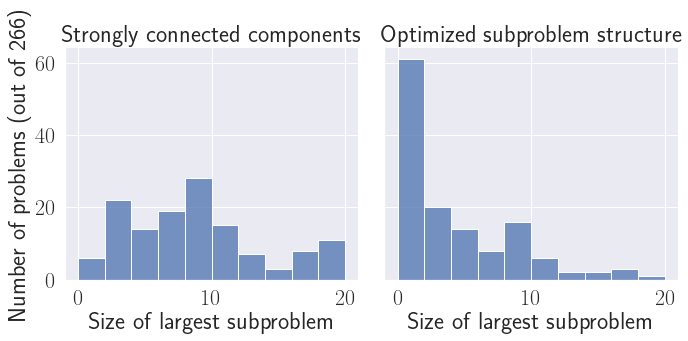

In [438]:
g = sns.displot(data=dfcompare2, x="sys_size", col='opt_type', color=sns.color_palette()[0]);
g.set_axis_labels(r'Size of largest subproblem',r'Number of problems (out of 266)')
g.set_titles(col_template = '{col_name}');
plt.savefig('minscc_finalsize.png', dpi=200, bbox_inches='tight');